In [1]:
# 10:35 AM
# 10:50 AM
import os; print(os.path.dirname(os.getcwd()).split('\\')[-1])

# NOTE: We do this together

01-Evr_Keras_Intro


<font color='red'>@@@</font>

Note - you may need to restart your kernel and reun the code while building the model architecture. Some cells should not be run twice.

For instance, if you re-run the cell that contains `model.add(Dense(100,...`, you are adding another layer to the network each time.

You would need to reinitialize your model/architecture if this happens.

<font color='red'>@@@</font>

# Activating Your First Artificial Neuron

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# the new imports!

# Keras allows 2 different ways to build models. Sequential stack is a linear stack of layers, where data flows sequentially through.
# Theres also a Model class, which lets you create sophisticated, fancier models.
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  # this lets us add dense layers

%matplotlib inline

<font color='red'>@@@</font>

Our starting model will resemble [this](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.13671&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=true&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) preconfigured model.

<font color='red'>@@@</font>

## Using a Single Neuron for Binary Classification

### Creating Dummy Data

In [2]:
# Generate 1000 demo data samples with 2 features and two centers
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

In [3]:
print(type(y))
y[0:20]

<class 'numpy.ndarray'>


array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [4]:
# Transforming y to a vertical vector
y = y.reshape(-1, 1)
print(y.shape)
y[0:5]

(1000, 1)


array([[1],
       [0],
       [0],
       [1],
       [1]])

<font color='red'>@@@</font>

We create a df only for plotting purposes.

<font color='red'>@@@</font>

In [5]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y
df.head()

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

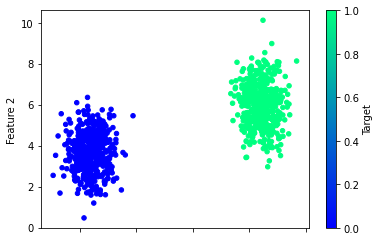

In [6]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

<font color='red'>@@@</font>

Like ML models, AI models are finicky and need data prepped.

Scaling the data via normalization or standardization will help it adjust the weights to minimize the loss function.

<font color='red'>@@@</font>

 ### Data Preprocessing

 Use `train_test_split` to create training and testing data.

In [7]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

 Scale the data using the `StandarScaler`.

In [8]:
# Create scaler instance
X_scaler = StandardScaler()

In [9]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [10]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 ### Neural Network Model Creation

<font color='red'>@@@</font>

The variable below is will hold the model's architecture. Here, we're using a single neuron model, so it is called neuron.

**NOTE: The images below show 3 inputs, but we actually have only 2!**

Feature 1 and Feature 2!

<font color='red'>@@@</font>

In [11]:
# Create a sequential model
neuron = Sequential()

The initial step is to add the first layer of our neural network.

![First Layer](../Images/tensorflow-neuron-layer-1.png)

<font color='red'>@@@</font>

Since this is the first layer, we define the number of inputs equal to the number of classes.

ReLu (rectified linear unit) is our activation function, which processes the values of the features when they're passed to the next layer. 

You generally want an activation function on the first layer, because it helps the net learn nonlinear relationships. That is, not straight line X-Y relationships. 

> What are activation functions, and why are they necessary? Without an activation function like relu (also called a non-linearity), the Dense layer would consist of two linear operations—a dot product and an addition: output = dot(W, input) + b
>
> So the layer could only learn linear transformations (affine transformations) of the input data: the hypothesis space of the layer would be the set of all possible linear transformations of the input data into a 16-dimensional space. Such a hypothesis space is too restricted and wouldn’t benefit from multiple layers of representations, because a deep stack of linear layers would still implement a linear operation: adding more layers wouldn’t extend the hypothesis space.
>
> In order to get access to a much richer hypothesis space that would benefit from deep representations, you need a non-linearity, or activation function. relu is the most popular activation function in deep learning, but there are many other candi-dates, which all come with similarly strange names: prelu, elu, and so on.

Francis Chollet, Deep Learning with Python, page 72

So what's up with `number_inputs`? This is the number of columns in our X (Feature 1 and Feature 2).

<font color='red'>@@@</font>

In [12]:
# First layer (input layer)
number_inputs = 2
number_hidden_nodes = 1

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

We finish creating our neural network by adding the output layer.

![Output layer](../Images/tensorflow-neuron-output-layer.png)

<font color='red'>@@@</font>

Since this is the output layer, we don't define any inputs. Sigmoid has been more or less replaced by ReLu today.

<font color='red'>@@@</font>

In [13]:
# Output layer
number_classes = 1

neuron.add(Dense(units=number_classes, activation="sigmoid"))

In [14]:
# Model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


 ### Compile the Model

<font color='red'>@@@</font>

We've defined the architecrure! Now, we compile it with a loss function and optimizer. 

Compiling = turns our model into machine code.

**loss** = `binary_crossentropy` is used for binary classification. It's the formula that calculates total error.

> the loss function takes the predictions of the network and the true target and computes a distance score, capturing how well the network has done on this specific example.

Chollet, 18

**Optimizers** = algos that mold the model as we train it. Here we use `adam`. It optimizes the weights by comparing prediction and the loss function.

> ...implements what's called the *Backpropagation* algorithm: the central algorithm in deep learning.

Chollet, 11

metrics = We use this to evauluate our model. We monitor this metric during training.

<font color='red'>@@@</font>

In [15]:
# Compile model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

 ### Fit the Model

<font color='red'>@@@</font>

Training the model means using the optimizer and loss function to update the weights during each iteration. 

Epochs = 
> Each iteration over all the training data.

Chollet, 53.

<font color='red'>@@@</font>

In [16]:
# Fitting the model with linear dummy data
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 679us/step - loss: 0.5355 - accuracy: 0.9467
Epoch 2/100
24/24 [==============================] - 0s 680us/step - loss: 0.5233 - accuracy: 0.9720
Epoch 3/100
24/24 [==============================] - 0s 678us/step - loss: 0.5111 - accuracy: 0.9733
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.9733
Epoch 5/100
24/24 [==============================] - 0s 964us/step - loss: 0.4865 - accuracy: 0.9760
Epoch 6/100
24/24 [==============================] - 0s 679us/step - loss: 0.4744 - accuracy: 0.9773
Epoch 7/100
24/24 [==============================] - 0s 679us/step - loss: 0.4624 - accuracy: 0.9787
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.9800
Epoch 9/100
24/24 [==============================] - 0s 678us/step - loss: 0.4389 - accuracy: 0.9813
Epoch 10/100
24/24 [==============================] - 0s 680us/step - loss: 0.4275 - accuracy: 

<font color='red'>@@@</font>

This training goes much faster with a video card, or GPU. Gaming computers have GPUs.

CPU vs GPU?
https://www.youtube.com/watch?v=_cyVDoyI6NE

Takeaway: GPUs render pixels. All matrix math. CPUs do one thing very fast. GPUs do many things somewhat quickly. Parallel processing. 

GPUs do AI processing very well. You could expect at least 10x faster training, depending on various factors.


<font color='red'>@@@</font>

 ### Evaluate the Model

 #### Plotting the Loss Function and Accuracy

<AxesSubplot:>

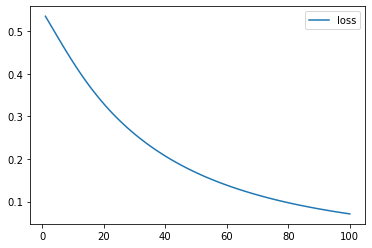

In [17]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

<AxesSubplot:>

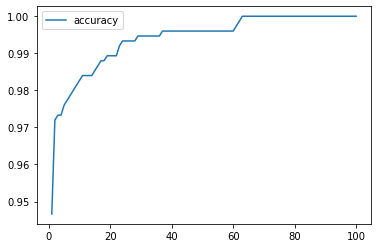

In [18]:
# Plot the accuracy
df.plot(y="accuracy")

 #### Evaluating the Model Using Testing Data

In [19]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0719 - accuracy: 1.0000 - 100ms/epoch - 13ms/step
Loss: 0.07192458212375641, Accuracy: 1.0


 ### Making Predictions with New Data

In [20]:
# Create 10 new samples of dummy data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

In [21]:
# Making predictions
predictions = (neuron.predict(new_X) > 0.5).astype("int32")
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": new_y})
results.head(10)

,predictions,actual
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


---

# Using a Single Neuron for Non-Linear Data

### Creating Demo Data:

In [22]:
# Creating dummy non-linear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

In [23]:
# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

In [24]:
# Creating a DataFrame to plot the non-linear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons
df_moons.head()

,Feature 1,Feature 2,Target
0,0.676217,0.815220,0
1,1.487143,-0.210519,1
2,-1.027709,0.354966,0
3,0.236012,1.025531,0
4,1.856695,-0.042783,1


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

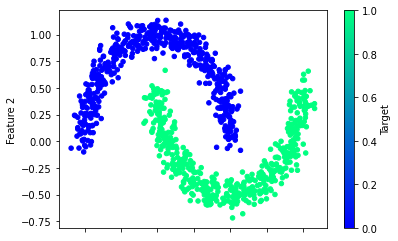

In [25]:
# Plotting the non-linear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

### Data Preprocessing

Use `train_test_split` to create training and testing data.

In [26]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

 Scale the data

In [27]:
# Create the scaler instance
X_moon_scaler = StandardScaler()

In [28]:
# Fit the scaler
X_moon_scaler.fit(X_moon_train)

StandardScaler()

In [29]:
# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

 ### Fit the Model

In [30]:
# Training the model with the non-linear data
model_moon = neuron.fit(X_moon_train_scaled, y_moon_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1935 - accuracy: 0.4440
Epoch 2/100
24/24 [==============================] - 0s 962us/step - loss: 1.0586 - accuracy: 0.4693
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9685 - accuracy: 0.4973
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9079 - accuracy: 0.5053
Epoch 5/100
24/24 [==============================] - 0s 679us/step - loss: 0.8599 - accuracy: 0.5160
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8224 - accuracy: 0.5333
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7912 - accuracy: 0.5413
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7643 - accuracy: 0.5520
Epoch 9/100
24/24 [==============================] - 0s 962us/step - loss: 0.7408 - accuracy: 0.5693
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7194 - accuracy: 0.5800
Epo

 ### Evaluate the Model

 #### Plotting the Loss Function and Accuracy

<AxesSubplot:>

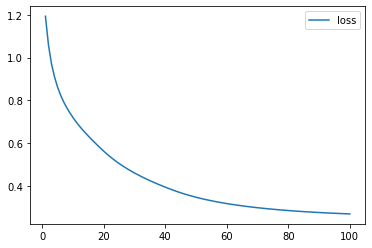

In [31]:
# Create a DataFrame with the history dictionary
df_moon = pd.DataFrame(
    model_moon.history, index=range(1, len(model_moon.history["loss"]) + 1)
)

# Plot the loss
df_moon.plot(y="loss")

<font color='red'>@@@</font>

Above, we want to see the loss function decrease as epochs (iterations) increase. This shows the model is learning to classify observations.

Below, we see that accuracy increases as iterations increase. This is another view of the learning that's happening.

**This is learning the training data.**

<font color='red'>@@@</font>

<AxesSubplot:>

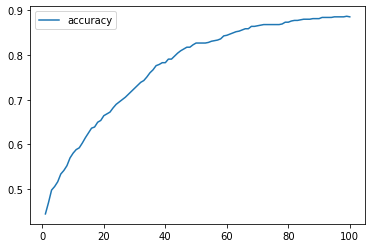

In [32]:
# Plot the accuracy
df_moon.plot(y="accuracy")

 #### Evaluating the Model Using Testing Data

In [33]:
# Evaluate the model using non-linear data
model_moon_loss, model_moon_accuracy = neuron.evaluate(X_moon_test_scaled, y_moon_test, verbose=2)
print(f"Loss: {model_moon_loss}")
print(f"Accuracy: {model_moon_accuracy}")

8/8 - 0s - loss: 0.2887 - accuracy: 0.8520 - 69ms/epoch - 9ms/step
Loss: 0.2886642515659332
Accuracy: 0.8519999980926514


 ### Making Predictions

In [34]:
# Create demo data
X_new_moons, y_new_moons = make_moons(n_samples=10, noise=0.08, random_state=78)

In [35]:
# Making predictions
predictions_moon = (neuron.predict(X_new_moons) > 0.5).astype("int32")

results = pd.DataFrame({"predictions": predictions_moon.ravel(), "actual": y_new_moons})
results.head(10)

,predictions,actual
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,0
7,1,1
8,1,1
9,0,1


<font color='red'>@@@</font>

The model above was effectively a logistic regression. We can improve it.

<font color='red'>@@@</font>